In [1]:
import pandas as pd
import numpy as np


In [2]:

cond_df = pd.read_excel('underlying_condition_china.xlsx')
cond_df


,underlying condition,crude death rate,death rate_all cases,country
0,cardiovascular disease,0.132,0.105,china
1,diabetes,0.092,0.073,china
2,chronic respiratory disease,0.080,0.063,china
3,hypertension,0.084,0.060,china
4,cancer,0.076,0.056,china
5,no pre-existing conditions,0.000,0.009,china


In [3]:
cols=pd.get_dummies(cond_df['underlying condition'])
cond_df.join(cols)

,underlying condition,crude death rate,death rate_all cases,country,cancer,cardiovascular disease,chronic respiratory disease,diabetes,hypertension,no pre-existing conditions
0,cardiovascular disease,0.132,0.105,china,0,1,0,0,0,0
1,diabetes,0.092,0.073,china,0,0,0,1,0,0
2,chronic respiratory disease,0.080,0.063,china,0,0,1,0,0,0
3,hypertension,0.084,0.060,china,0,0,0,0,1,0
4,cancer,0.076,0.056,china,1,0,0,0,0,0
5,no pre-existing conditions,0.000,0.009,china,0,0,0,0,0,1


# underlying conditions with death rate

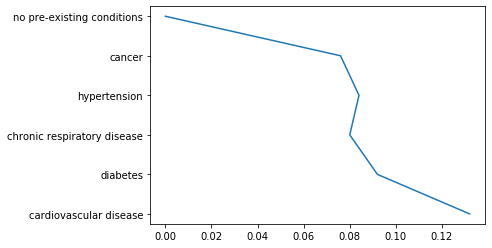

In [7]:
import matplotlib.pyplot as plt
cause = cond_df['underlying condition']
mort_rate = cond_df['crude death rate'].fillna('0')
plt.plot(mort_rate, cause)


In [5]:
mul_r = pd.DataFrame()
mul_r = cols
mort_rate = cond_df['death rate_all cases']

In [6]:
from statsmodels.api import OLS
model = OLS(mort_rate, mul_r)
result = model.fit()
result.summary()

/Users/chaitanyadeepikakudupudi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/chaitanyadeepikakudupudi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/chaitanyadeepikakudupudi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/Users/chaitanyadeepikakudupudi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: invalid value encountered in double_scalars
  return self.ssr/self.df_resid
/Users/chaitanyadeepikakudupudi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     death rate_all cases   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Tue, 23 Jun 2020   Prob (F-statistic):                nan
Time:                          10:23:58   Log-Likelihood:                    inf
No. Observations:                     6   AIC:                              -inf
Df Residuals:                         0   BIC:                              -inf
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
cancer                          0.0560        nan        nan        nan         nan         nan
cardiovascular disease          0.1050        nan        nan        nan         nan         nan
chronic respiratory disease     0.0630        nan        nan        nan         nan         nan
diabetes                        0.0730        nan        nan        nan         nan         nan
hypertension                    0.0600        nan        nan        nan         nan         nan
no pre-existing conditions      0.0090        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.250
Skew:                           0.000   Prob(JB):                        0.325
Kurtosis:                       0.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""